In [125]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.ticker import FuncFormatter

plt.style.use('seaborn-whitegrid')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import time
import gc

In [150]:
# read the cleaned data from last workshop
start_time = time.time()
df = pd.read_csv('./COVID_complete_v2.csv', engine='python') 

df['Confirmed'] = df['Confirmed'].astype(int)
df['Deaths'] = df['Deaths'].astype(int)
df['Recovered'] = df['Recovered'].astype(int)

df['Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')
df['Active_case'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
#Estimates time taken for the action
print('Time taken:'+str((time.time() - start_time))+' seconds')  
del start_time

Time taken:0.9405608177185059 seconds


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81452 entries, 0 to 81451
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              81452 non-null  int64 
 1   ObservationDate  81452 non-null  object
 2   Province/State   81452 non-null  object
 3   Country/Region   81452 non-null  object
 4   Last Update      81452 non-null  object
 5   Confirmed        81452 non-null  int64 
 6   Deaths           81452 non-null  int64 
 7   Recovered        81452 non-null  int64 
 8   Active_case      81452 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 5.6+ MB


In [152]:
df.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1,0,0,1
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14,0,0,14
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6,0,0,6
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1,0,0,1
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0,0,0,0


In [153]:
df = df[df['ObservationDate'] == max(df['ObservationDate'])].reset_index()

In [154]:
df

,index,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case
0,80877,116231,09/23/2020,Abruzzo,Italy,2020-09-24 04:23:38,4249,477,3012,760
1,80878,116232,09/23/2020,Acre,Brazil,2020-09-24 04:23:38,27246,651,24562,2033
2,80879,116233,09/23/2020,Adygea Republic,Russia,2020-09-24 04:23:38,3873,31,3330,512
3,80880,116234,09/23/2020,Aguascalientes,Mexico,2020-09-24 04:23:38,6825,592,5793,440
4,80881,116235,09/23/2020,Aichi,Japan,2020-09-24 04:23:38,5152,83,4633,436
...,...,...,...,...,...,...,...,...,...,...
570,81447,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149,49,1158,1942
571,81448,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270,72,0,1198
572,81449,116803,09/23/2020,Zhejiang,China,2020-09-24 04:23:38,1282,1,1272,9
573,81450,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191,92,2853,2246


In [155]:
Data_world = df.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index()

In [156]:
Data_world

,ObservationDate,Confirmed,Active_case,Recovered,Deaths
0,09/23/2020,23761605,7128594,15882454,750557


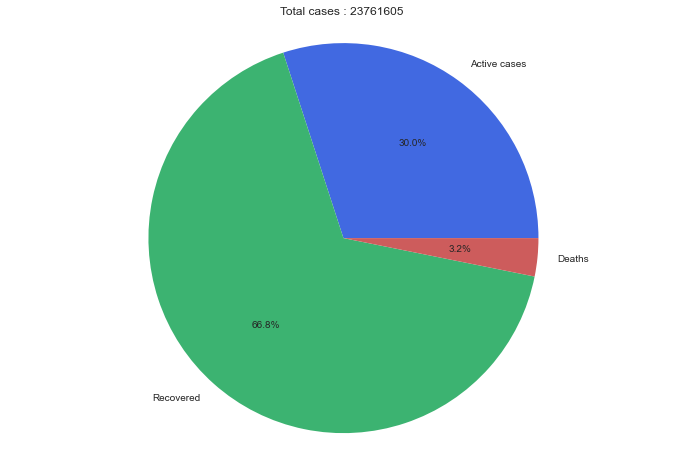

In [157]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Active cases","Recovered","Deaths"
values = Data_world.loc[0, ["Active_case","Recovered","Deaths"]]
my_colors = ['royalblue','mediumseagreen','indianred']

fig1, ax1 = plt.subplots()
ax1.pie(values,labels=labels, colors=my_colors,autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Total cases : '+str(Data_world["Confirmed"][0]))
plt.show()

In [158]:
Data_per_country = df.groupby(["Country/Region"])["Confirmed","Active_case","Recovered","Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)
Data_per_country

,Country/Region,Confirmed,Active_case,Recovered,Deaths
0,US,6933548,4061408,2670256,201884
1,India,5646010,968377,4587613,90020
2,Brazil,4591364,406432,4046827,138105
3,Russia,1117487,177165,920602,19720
4,Colombia,784268,97245,662277,24746
5,Peru,776546,108489,636489,31568
6,Mexico,710049,33489,601611,74949
7,Spain,693556,512146,150376,31034
8,Chile,449903,12393,425165,12345
9,UK,412245,368047,2247,41951


In [159]:
Data_per_country.shape

(24, 5)

In [160]:
Data_per_country['Confirmed'].describe()

count    2.400000e+01
mean     9.900669e+05
std      1.884582e+06
min      4.600000e+01
25%      8.398775e+04
50%      2.907810e+05
75%      7.266732e+05
max      6.933548e+06
Name: Confirmed, dtype: float64

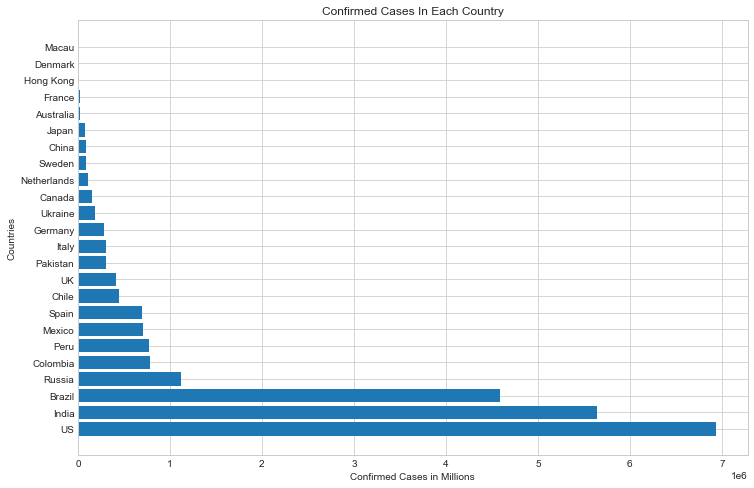

In [161]:
fig, ax = plt.subplots()
plt.barh(Data_per_country['Country/Region'],Data_per_country['Confirmed'])
ax.set_xlabel('Confirmed Cases in Millions')
ax.set_ylabel('Countries')
ax.set_title('Confirmed Cases In Each Country')
plt.show()

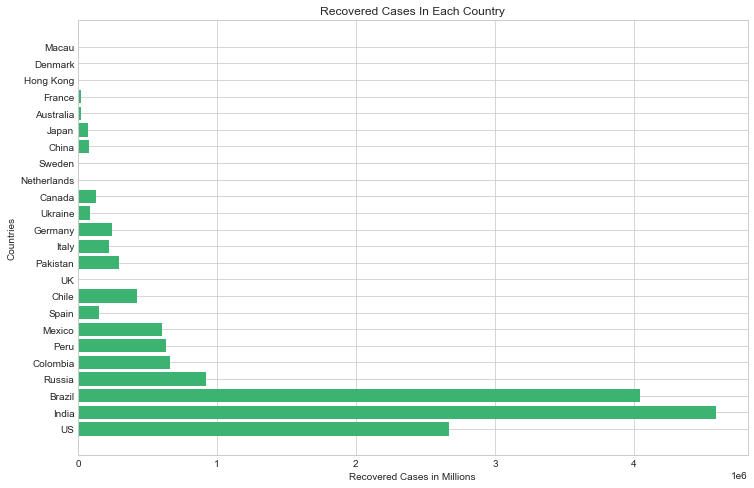

In [162]:
fig, ax = plt.subplots()
plt.barh(Data_per_country['Country/Region'],Data_per_country['Recovered'],color='mediumseagreen')
ax.set_xlabel('Recovered Cases in Millions')
ax.set_ylabel('Countries')
ax.set_title('Recovered Cases In Each Country')
plt.show()

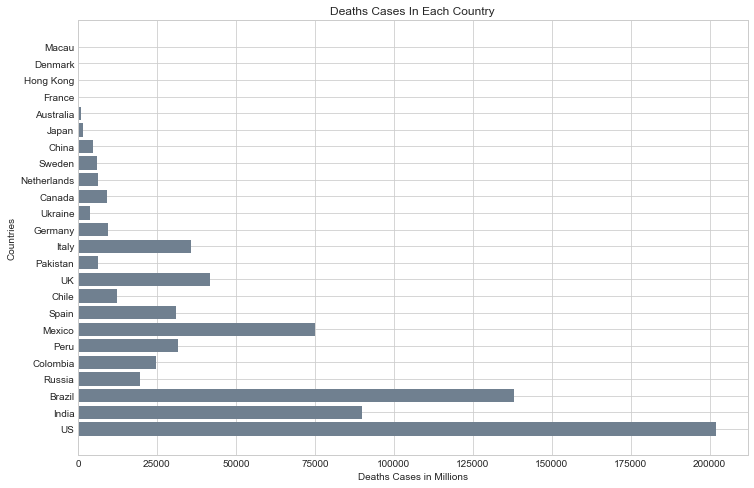

In [163]:
fig, ax = plt.subplots()
plt.barh(Data_per_country['Country/Region'],Data_per_country['Deaths'],color='slategrey')
ax.set_xlabel('Deaths Cases in Millions')
ax.set_ylabel('Countries')
ax.set_title('Deaths Cases In Each Country')
plt.show()

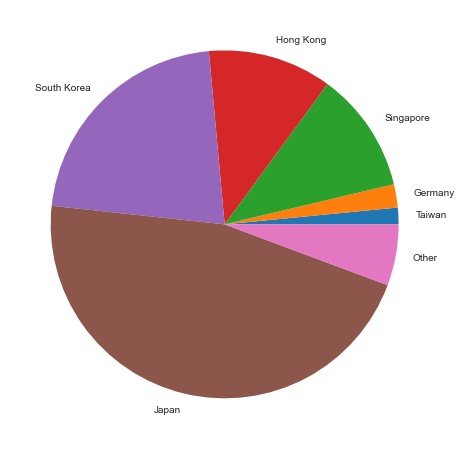

In [178]:
cat_totals = df.groupby("country")["case_in_country"].sum().sort_values()
small_cat_totals = cat_totals[cat_totals < 500]
big_cat_totals = cat_totals[cat_totals > 500]
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie", label="")

In [219]:
df['symptom'] = df['symptom'].str.replace('feaver', 'fever')
symptoms_data = df['symptom'].dropna()
symptoms_data

194    fever, cough, difficult in breathing
195    fever, cough, difficult in breathing
196                                   fever
217                                   fever
221                                   fever
                       ...                 
836                                   cough
851               fever, cough, sore throat
854                                   fever
861                      sore throat, fever
880                                   cough
Name: symptom, Length: 269, dtype: object

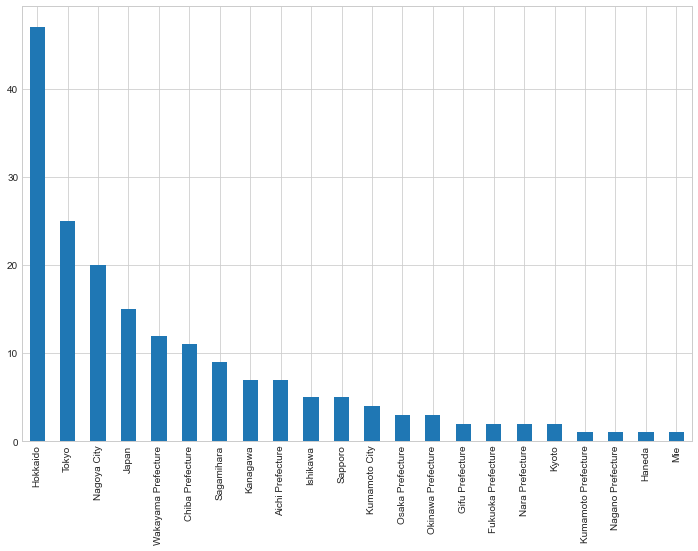

In [180]:
# get 
japan_location = df[df['country'] == 'Japan' ]
japan_location['location'].value_counts().plot(kind='bar')